$nCycles$ - number of simulation cycles

$nBuyers$  - number of the buyers

$nSellers$ - number of the sellers

$d_0$ - the lower bound for random uniform numbers, both for the buyers and the sellers in the warming up phase; in the running phase, the lower bound is $0$

$d_1$ - the upper bound for random uniform numbers for the buyers

$d_2$ - the upper bound for random uniform numbers for the sellers

initial buyer $i$ reservation price, different for each buyer: $p_{b,i}=\frac{1} {1 + u_i}$ with $u_i\sim\mathcal{U}(d_0,d_1)$

initial seller j reservation price, different for each seller: $p_{s,j}=1 + u_j$ with $u_j\sim\mathcal{U}(d_0,d_2)$

the running prices are changing following the correction coefficients:

$c_b=\frac{1} {1 + u_b}$ or $c_b=1 + u_b$ with $u_b\sim\mathcal{U}(0,d_1)$

$c_s=\frac{1} {1 + u_s}$ or $c_s=1 + u_s$ with $u_s\sim\mathcal{U}(0,d_2)$

In [1]:
%pylab inline
import statistics as s
import numpy as np
import pylab as plt
from IPython.display import clear_output
import time

Populating the interactive namespace from numpy and matplotlib


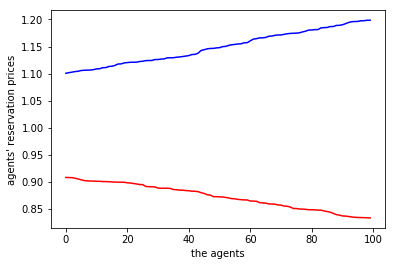

In [24]:
# warming up for the corrupted versione

# run it before executing both - the hayekian perspective or
#                              - the unstructured case

d0=0.1
d1=0.2
d2=0.2

nCycles=10000
nBuyers= 100
nSellers=100

buyerPriceList=[]
sellerPriceList=[]

for i in range(nBuyers):
    buyerPriceList.append([1/(1+np.random.uniform(d0,d1)),0])
for j in range(nSellers):
    sellerPriceList.append([1+np.random.uniform(d0,d2),0])

# zip is an iterator over a list (* means iterable)    
plt.plot(list(zip(*sorted(buyerPriceList, reverse=True)))[0],"r");
plt.plot(list(zip(*sorted(sellerPriceList)))[0],"b");
xlabel("the agents");
ylabel("agents' reservation prices");

time 10000 and n. of exchanges in the last cycle 45
mean and var of exchange prices in the last cycle: 1.323, 0.192


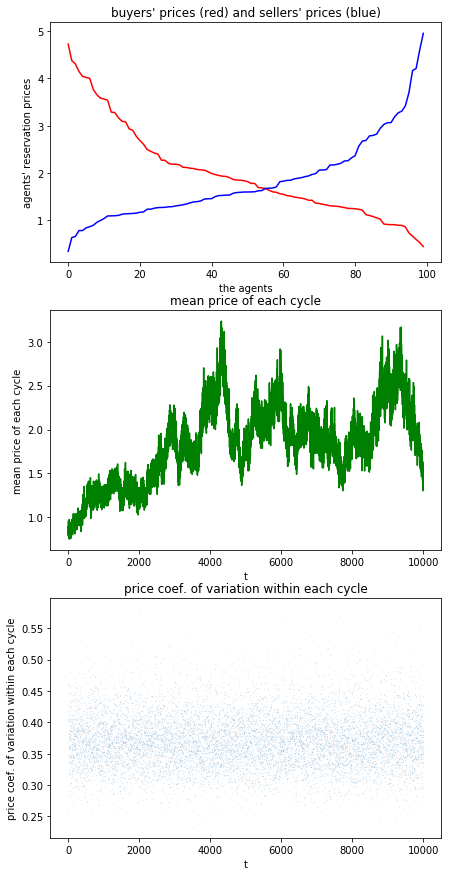

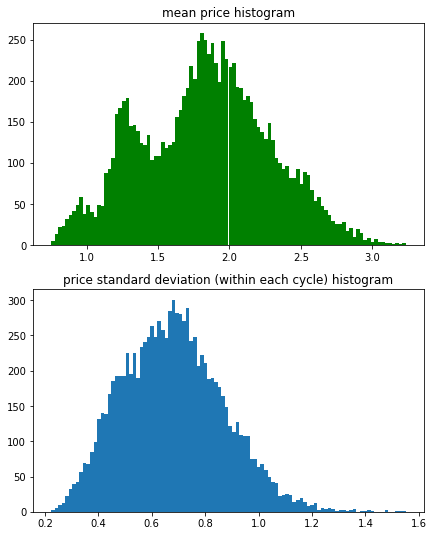

In [25]:
# corrupted hayekian perspective
meanPrice_ts=[]
meanPriceStDev_ts=[]
meanPriceVar_ts=[]

for t in range(1,nCycles+1):    
    dealPrices=[]
    agNum=max(nBuyers,nSellers)
    for n in range(agNum):
        i = np.random.randint(0,nBuyers)
        j = np.random.randint(0,nSellers)
        #print ('%2d %2d %.3f %.3f %.3f'% \
        #      (i,j,buyerPriceList[i]-sellerPriceList[j],\
        #       buyerPriceList[i],sellerPriceList[j]))
        
        if buyerPriceList[i][0]>=sellerPriceList[j][0]:
            dealPrices.append(sellerPriceList[j][0])
            buyerPriceList[i][0] *=1/(1+np.random.uniform(d1))
            buyerPriceList[i][1] +=1 # success
            sellerPriceList[j][0]*=1+np.random.uniform(d2)
            sellerPriceList[j][1]+=1 # success
        else:
            buyerPriceList[i][0] *=1+np.random.uniform(d1)
            buyerPriceList[i][1] -=1 # failure
            sellerPriceList[j][0]*=1/(1+np.random.uniform(d2))
            sellerPriceList[j][1]-=1 # failure
            
        #print ('%2d %2d %.3f %.3f %.3f \n'% \
        #      (i,j,buyerPriceList[i]-sellerPriceList[j],\
        #       buyerPriceList[i],sellerPriceList[j]))
        
    # corrections
           
    if len(dealPrices) > 2:
        meanPrice_ts.append(s.mean(dealPrices))
        meanPriceVar_ts.append(s.variance(dealPrices))
        meanPriceStDev_ts.append(s.stdev(dealPrices))
    else:
        meanPrice_ts.append(np.nan)
        meanPriceStDev_ts.append(np.nan)

    if t % 1000==0:
        clear_output()
        print('time', t, 'and n. of exchanges in the last cycle', \
              len(dealPrices))
        print(\
        'mean and var of exchange prices in the last cycle: %.3f, %.3f' %\
              (meanPrice_ts[-1],meanPriceVar_ts[-1]))

        plt.figure(1,figsize=(7,15),clear=True)

        plt.subplot(311)
        plt.plot(list(zip(*sorted(buyerPriceList, reverse=True)))[0],"r")
        plt.plot(list(zip(*sorted(sellerPriceList)))[0],"b")
        plt.title(\
            "buyers' prices (red) and sellers' prices (blue)")
        xlabel("the agents")
        ylabel("agents' reservation prices")

        plt.subplot(312)
        plt.title("mean price of each cycle")
        xlabel("t")
        ylabel("mean price of each cycle")
        plt.plot(meanPrice_ts,"g")
        
        plt.subplot(313)
        plt.title("price coef. of variation within each cycle")
        coefOfVariation=[]
        for m in range(len(meanPriceStDev_ts)):
            coefOfVariation.append(meanPriceStDev_ts[m]/
                                   meanPrice_ts[m])
        plt.plot(coefOfVariation,".",markersize=0.1)
        xlabel("t")
        ylabel("price coef. of variation within each cycle")
        show()
        #time.sleep(0.1)

plt.figure(2,figsize=(7,9))
plt.subplot(211)
plt.title("mean price histogram")
plt.hist(meanPrice_ts,100,color="g");
plt.subplot(212)
plt.title("price standard deviation (within each cycle) histogram")
plt.hist(meanPriceStDev_ts,100);

In [29]:
list(zip(*sorted(sellerPriceList)))[1]

(-50,
 11,
 -19,
 16,
 -39,
 -25,
 -55,
 -16,
 -24,
 42,
 23,
 -26,
 -43,
 5,
 8,
 -28,
 -2,
 37,
 33,
 -13,
 13,
 -1,
 79,
 48,
 -6,
 15,
 -15,
 20,
 26,
 -4,
 -26,
 -27,
 41,
 10,
 0,
 4,
 11,
 11,
 -17,
 -74,
 7,
 -89,
 47,
 -29,
 -23,
 30,
 -8,
 11,
 10,
 35,
 46,
 21,
 30,
 20,
 -26,
 48,
 18,
 7,
 15,
 -32,
 38,
 -33,
 22,
 -12,
 -23,
 27,
 -3,
 -14,
 22,
 65,
 24,
 -8,
 -12,
 10,
 -1,
 29,
 -38,
 20,
 -56,
 37,
 3,
 2,
 -56,
 49,
 15,
 17,
 0,
 14,
 -16,
 30,
 -77,
 -25,
 -55,
 20,
 -15,
 24,
 -9,
 -71,
 16,
 -55)